### TAREA 1 — Validación Inicial

In [4]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import imagehash


### Define las carpetas que contienen las imágenes originales.
### Estas carpetas representan diferentes vuelos o recorridos del dron.

In [ ]:
RUTA_BASE = r"C\DATASETS\dataset_original" #INGRESAR LA RUTA
# Nombres EXACTOS de tus carpetas
CARPETAS_VUELO = ["VUELO 1", "VUELO 2"]
# Extensiones aceptadas
EXTENSIONES_IMG = (".jpg", ".jpeg", ".png")
# Resolución esperada (según tu dataset original)
RESOLUCION_ESPERADA = (5472, 3648)

In [ ]:
ruta = os.path.join(RUTA_BASE, carpeta)

In [2]:
# Se recorre cada carpeta en CARPETAS_VUELO para contar cuántas imágenes contiene.
# Este bloque construye una tabla con el nombre de la carpeta y el número de imágenes detectadas.

In [ ]:
conteos = []

for carpeta in CARPETAS_VUELO:
    ruta = os.path.join(RUTA_BASE, carpeta)
    archivos = [f for f in os.listdir(ruta) if f.lower().endswith(EXTENSIONES_IMG)]
    conteos.append({"Carpeta": carpeta, "Cantidad_imagenes": len(archivos)})

df_conteo_vuelos = pd.DataFrame(conteos)
df_conteo_vuelos.loc["Total"] = ["Total", df_conteo_vuelos["Cantidad_imagenes"].sum()]

df_conteo_vuelos

,Carpeta,Cantidad_imagenes
0,VUELO 1,1206
1,VUELO 2,702
Total,Total,1908


### IMAGENES QUE SE SELECCIONARON DE MANERA MANUAL

In [ ]:
# Carpeta de las imagenes seleccionadas manualmente
RUTA_VALIDADO = r"C:\Users\GARI\Documents\DATASETS"

### Conteo del conjunto validado
Aquí el código solo cuenta cuántas imágenes hay en la carpeta donde tú guardes las seleccionadas manualmente.

In [30]:
archivos_validos = [
    f for f in os.listdir(RUTA_VALIDADO)
    if f.lower().endswith(EXTENSIONES_IMG)
]

num_validas = len(archivos_validos)
num_inicial = df_conteo_vuelos.loc["Total", "Cantidad_imagenes"]
num_descartadas = num_inicial - num_validas
porc_validas = (num_validas / num_inicial) * 100

print("Imágenes iniciales:", num_inicial)
print("Imágenes válidas (seleccionadas manualmente):", num_validas)
print("Imágenes descartadas:", num_descartadas)
print("Porcentaje de válidas: {:.2f}%".format(porc_validas))

df_resumen = pd.DataFrame([
    {"Categoría": "Imágenes iniciales", "Cantidad": num_inicial},
    {"Categoría": "Imágenes válidas (seleccionadas)", "Cantidad": num_validas},
    {"Categoría": "Imágenes descartadas", "Cantidad": num_descartadas},
    {"Categoría": "Porcentaje de válidas (%)", "Cantidad": f"{porc_validas:.2f}"}
])

df_resumen


Imágenes iniciales: 1908
Imágenes válidas (seleccionadas manualmente): 1111
Imágenes descartadas: 797
Porcentaje de válidas: 58.23%


,Categoría,Cantidad
0,Imágenes iniciales,1908
1,Imágenes válidas (seleccionadas),1111
2,Imágenes descartadas,797
3,Porcentaje de válidas (%),58.23


### Gráfico de barras (imágenes por vuelo)

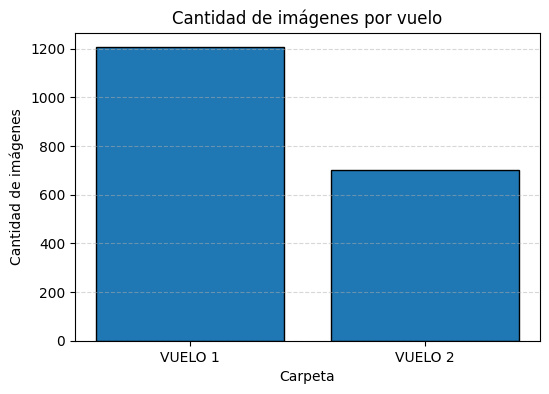

In [33]:
plt.figure(figsize=(6,4))
plt.bar(df_conteo_vuelos["Carpeta"].iloc[:2],
        df_conteo_vuelos["Cantidad_imagenes"].iloc[:2],
        edgecolor="black")
plt.title("Cantidad de imágenes por vuelo")
plt.xlabel("Carpeta")
plt.ylabel("Cantidad de imágenes")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()


### Gráfico circular (válidas vs descartadas)

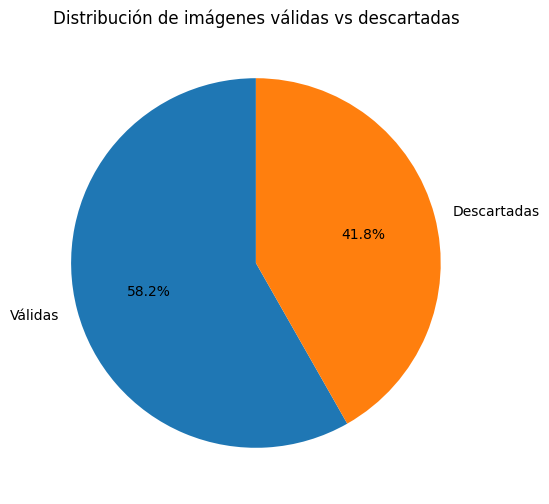

In [34]:
plt.figure(figsize=(6,6))
plt.pie([num_validas, num_descartadas],
        labels=["Válidas", "Descartadas"],
        autopct='%1.1f%%',
        startangle=90)
plt.title("Distribución de imágenes válidas vs descartadas")
plt.show()
